# State vs Behavior Verification

**Problem:** Co sprawdzać - stan obiektów czy ich interakcje?

**Rozwiązanie:** Wybierz strategię według kontekstu.

**Analogia:** Stan = sprawdź czy kawa jest gotowa. Behavior = sprawdź czy ekspres został włączony.

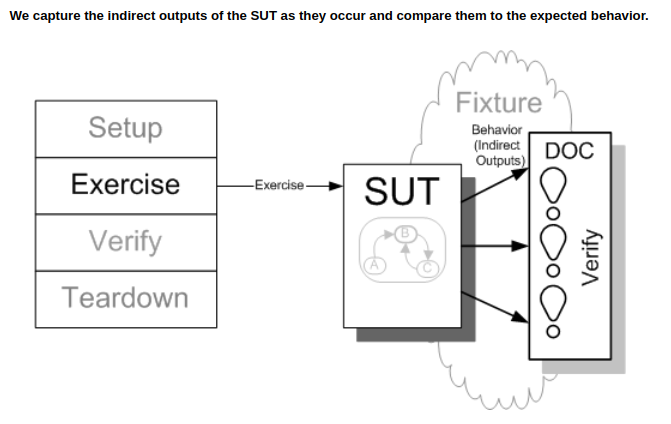

In [ ]:
class BankAccount:
    def __init__(self, balance=0):
        self.balance = balance
        self.transaction_log = []
    
    def deposit(self, amount):
        self.balance += amount
        self.transaction_log.append(f"Deposit: +{amount}")
    
    def notify_user(self, notification_service, message):
        notification_service.send(self.account_id, message)

## State Verification - Sprawdzanie stanu

In [ ]:
def test_deposit_updates_balance():
    """State verification - sprawdzamy stan obiektu"""
    # Arrange
    account = BankAccount(balance=100)
    
    # Act
    account.deposit(50)
    
    # Assert - sprawdzamy STAN
    assert account.balance == 150  # Stan się zmienił
    assert "Deposit: +50" in account.transaction_log  # Stan historii

## Behavior Verification - Sprawdzanie zachowania

In [ ]:
from unittest.mock import Mock

def test_deposit_sends_notification():
    """Behavior verification - sprawdzamy interakcje"""
    # Arrange
    account = BankAccount()
    account.account_id = "12345"
    mock_notification = Mock()
    
    # Act
    account.notify_user(mock_notification, "Deposit successful")
    
    # Assert - sprawdzamy ZACHOWANIE
    mock_notification.send.assert_called_once_with(
        "12345", "Deposit successful"
    )  # Czy metoda została wywołana z prawidłowymi argumentami?

## Kombinacja obu podejść

In [ ]:
def test_deposit_complete_flow():
    """Kombinacja state + behavior verification"""
    # Arrange
    account = BankAccount(balance=100)
    account.account_id = "12345"
    mock_notification = Mock()
    
    # Act
    account.deposit(50)
    account.notify_user(mock_notification, "Deposit successful")
    
    # Assert - STATE verification
    assert account.balance == 150
    assert len(account.transaction_log) == 1
    
    # Assert - BEHAVIOR verification  
    mock_notification.send.assert_called_once_with(
        "12345", "Deposit successful"
    )

## Kiedy State, kiedy Behavior?

In [ ]:
# STATE VERIFICATION - gdy sprawdzasz WYNIK
class Calculator:
    def __init__(self):
        self.result = 0
    
    def add(self, value):
        self.result += value

def test_calculator_state():
    calc = Calculator()
    calc.add(5)
    assert calc.result == 5  # Sprawdzamy stan - wynik operacji

# BEHAVIOR VERIFICATION - gdy sprawdzasz INTERAKCJE
class OrderProcessor:
    def __init__(self, payment_service, email_service):
        self.payment_service = payment_service
        self.email_service = email_service
    
    def process_order(self, order):
        self.payment_service.charge(order.amount)
        self.email_service.send_confirmation(order.email)

def test_order_processor_behavior():
    # Mockujemy dependencje
    mock_payment = Mock()
    mock_email = Mock()
    
    processor = OrderProcessor(mock_payment, mock_email)
    order = Mock(amount=100, email="user@example.com")
    
    processor.process_order(order)
    
    # Sprawdzamy zachowanie - czy wywołano odpowiednie metody
    mock_payment.charge.assert_called_once_with(100)
    mock_email.send_confirmation.assert_called_once_with("user@example.com")

## Zalety i wady

### State Verification ✅
- **Prostsze** - sprawdzasz końcowy wynik
- **Mniej kruche** - nie zależy od implementacji
- **Naturalne** - jak myśli użytkownik

### Behavior Verification ✅
- **Dokładniejsze** - sprawdzasz każdą interakcję
- **Szybsze** - nie potrzebujesz prawdziwych dependencji
- **Izolowane** - testujesz tylko SUT

### Wady ❌
- **State**: Może nie wychwycić błędów w interakcjach
- **Behavior**: Kruche testy przy zmianach implementacji

**Zasada:** State dla logiki biznesowej, Behavior dla orchestracji!